In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math

**1**

In [2]:
spy = pd.read_csv("SPY.csv")
aapl = pd.read_csv("AAPL.csv")
jpm = pd.read_csv("JPM.csv")
spy.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-18,242.899994,244.190002,242.199997,242.710007,221.625076,136748000
1,2017-08-21,242.639999,243.199997,241.830002,242.899994,221.798553,65469700
2,2017-08-22,243.570007,245.619995,243.550003,245.440002,224.117874,63140100
3,2017-08-23,244.330002,245.050003,244.160004,244.559998,223.314331,50203800
4,2017-08-24,245.000000,245.179993,243.750000,243.990005,222.793839,50741700


<AxesSubplot:xlabel='Date'>

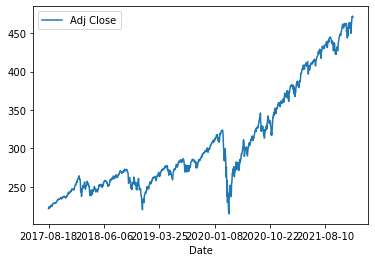

In [3]:
spy.plot(x='Date', y='Adj Close')

**2**

In [4]:
spy['Return'] = spy['Adj Close'].pct_change()
aapl['AAPL Return'] = aapl['Adj Close'].pct_change()
jpm['JPM Return'] = jpm['Adj Close'].pct_change()

In [5]:
print(spy['Return'].head())

0         NaN
1    0.000783
2    0.010457
3   -0.003585
4   -0.002331
Name: Return, dtype: float64


In [6]:
print(aapl['AAPL Return'].head())

0         NaN
1   -0.001842
2    0.016348
3    0.001252
4   -0.004438
Name: AAPL Return, dtype: float64


In [7]:
print(jpm['JPM Return'].head())

0         NaN
1   -0.001212
2    0.010262
3    0.001201
4   -0.001636
Name: JPM Return, dtype: float64


**3**

In [8]:
spy = spy.dropna()
aapl = aapl.dropna()
jpm = jpm.dropna()

In [9]:
X = spy['Return'].values.reshape(-1, 1)
Y = aapl['AAPL Return'].values.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(1099, 1)
(1099, 1)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X, Y)

LinearRegression()

In [13]:
print(f'intercept: {lr.intercept_}')
print(f'beta: {lr.coef_}')

intercept: [0.00067911]
beta: [[1.22942321]]


**4**

In [14]:
app = aapl['AAPL Return']
jp = jpm['JPM Return']

In [15]:
app = pd.DataFrame(app)
jp = pd.DataFrame(jp)

com = app.join(jp)

In [16]:
com

,AAPL Return,JPM Return
1,-0.001842,-0.001212
2,0.016348,0.010262
3,0.001252,0.001201
4,-0.004438,-0.001636
5,0.003705,0.004043
...,...,...
1095,0.003644,0.003574
1096,0.022975,0.005723
1097,-0.005767,0.003035
1098,0.000502,-0.000504


In [17]:
com['Type'] = ''

In [18]:
i = 0

for i in range(0, 1100):
    if i <= 100:
        com['Type'][i] = 'Historical'
        i=i+1
    else:
        com['Type'][i] = 'Future'
        i=i+1
        
com

C:\Users\Shivam\AppData\Local\Temp/ipykernel_15452/4194595880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com['Type'][i] = 'Historical'
C:\Users\Shivam\AppData\Local\Temp/ipykernel_15452/4194595880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com['Type'][i] = 'Future'


,AAPL Return,JPM Return,Type
1,-0.001842,-0.001212,Historical
2,0.016348,0.010262,Historical
3,0.001252,0.001201,Historical
4,-0.004438,-0.001636,Historical
5,0.003705,0.004043,Historical
...,...,...,...
1095,0.003644,0.003574,Future
1096,0.022975,0.005723,Future
1097,-0.005767,0.003035,Future
1098,0.000502,-0.000504,Future


In [19]:
hist = com[com['Type'] == 'Historical']
fut = com[com['Type'] == 'Future']

In [20]:
len(hist)

100

In [21]:
hist.describe()

,AAPL Return,JPM Return
count,100.000000,100.000000
mean,0.001161,0.002157
std,0.010529,0.009370
min,-0.025370,-0.023882
25%,-0.004492,-0.003486
50%,0.000116,0.001213
75%,0.006574,0.007643
max,0.035830,0.035025


**AAPL**

Mean = 0.116%
Std Dev = 1.053%

**JPM**

Mean = 0.216%
Std Dev = 0.937%

**5**

In [22]:
np.corrcoef(hist['AAPL Return'], hist['JPM Return'])

array([[1.        , 0.04786991],
       [0.04786991, 1.        ]])

**Correlation = 0.048**

**6**

In [23]:
mean_a = hist['AAPL Return'].mean()
mean_b = hist['JPM Return'].mean()
std_a = hist['AAPL Return'].std()
std_b = hist['JPM Return'].std()

In [24]:
mean_a

0.0011608111326204796

In [25]:
np.corrcoef(fut['AAPL Return'], fut['JPM Return'])

array([[1.       , 0.4561531],
       [0.4561531, 1.       ]])

In [26]:
cor = 0.4561531

In [27]:
w1 = [0.2, 0.4, 0.6, 0.8]
w2 = [0.8, 0.6, 0.4, 0.2]

In [28]:
for i in range(0, 4):
    print(f'Portfoio Mean {(i+1)}: {(w1[i] * mean_a + w2[i] * mean_b)}')
    i=i+1

Portfoio Mean 1: 0.001957483200528952
Portfoio Mean 2: 0.0017583151835518333
Portfoio Mean 3: 0.0015591471665747157
Portfoio Mean 4: 0.0013599791495975976


In [29]:
for i in range(0, 4):
    var1 = (w1[i])**2 + (std_a)**2
    var2 = (w2[i])**2 + (std_b)**2
    cov = 2 * (w1[i]) * (w2[i]) * (std_a) * (std_b) * (cor)
    var = var1 + var2 + cov
    print(f'Portfolio Std Dev {(i+1)}: {math.sqrt(var)}')
    i=i+1

Portfolio Std Dev 1: 0.824750302049697
Portfolio Std Dev 2: 0.721262962583235
Portfolio Std Dev 3: 0.721262962583235
Portfolio Std Dev 4: 0.824750302049697


**7**

In [30]:
print(f'Sharpe Ratio AAPL: {mean_a/std_a}')
print(f'Sharpe Ratio JPM: {mean_b/std_b}')

Sharpe Ratio AAPL: 0.1102446286099221
Sharpe Ratio JPM: 0.23017291300431122


In [31]:
for i in range(0,4):
    mean = (w1[i] * mean_a + w2[i] * mean_b)
    var1 = (w1[i])**2 + (std_a)**2
    var2 = (w2[i])**2 + (std_b)**2
    cov = 2 * (w1[i]) * (w2[i]) * (std_a) * (std_b) * (cor)
    var = var1 + var2 + cov
    std = math.sqrt(var)
    print(f'Portfolio Sharpe ratio {(i+1)}: {(mean/std)}')
    i=i+1

Portfolio Sharpe ratio 1: 0.0023734252605475247
Portfolio Sharpe ratio 2: 0.002437828191335862
Portfolio Sharpe ratio 3: 0.0021616903230280418
Portfolio Sharpe ratio 4: 0.001648958655992889
